# Problem-1: Linear Regression

# Tasks List
Complete a Jupyter notebook assignment to build a linear regression model from scratch using gradient descent. The assignment includes:
1. **Synthetic data generation**: Generate a small dataset scattered around a line.
2. **Function stubs**: Functions are provided for the linear regression model, cost function (Mean Squared Error), and gradient descent algorithm, with clear spaces for to fill in the code.
3. **Training and visualization**: Complete the Code to train the model using the implemented functions and visualize the results (original data and fitted line).
5. **Explanations about the step**: Brief explanations for each step of the process are provided. The goal is to understand the underlying mechanics of linear regression and gradient descent.

## 1. Generate synthetic data

### Subtask:
Create a small dataset of 10 points scattered around a line.


In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10 random values for X
np.random.seed(42) # for reproducibility
X = 10 * np.random.rand(10, 1)

# Generate y based on a linear relationship with noise
y = 2 * X + 1 + np.random.randn(10, 1)*3

# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (10, 1)
Shape of y: (10, 1)


### 2. Train and Test Split

In [127]:
## Train and Test Data splitting:

print('  X(feature)','|','y(output)')
print('-------------------------')
for i,j in zip(X,y):
  print(' ',round(i[0],4),'    |',round(j[0],4))

print('-------------------------') # Here are list of unknown 'y' that need to be predicted
                                   # using feature value
print(' ',round(4.2562,4),'    |','?')
print(' ',round(2.3456,4),'    |','?')
print(' ',round(9.2134,4),'    |','?')

  X(feature) | y(output)
-------------------------
  3.7454     | 7.0824
  9.5071     | 21.642
  7.3199     | 14.2496
  5.9866     | 11.576
  1.5602     | 4.8463
  1.5599     | -1.62
  0.5808     | -3.0131
  8.6618     | 16.6367
  6.0112     | 9.9838
  7.0807     | 16.1042
-------------------------
  4.2562     | ?
  2.3456     | ?
  9.2134     | ?


### Our goal is to find the output value when feature values are 4.2562, 2.3456 and 9.2134

### 3. Implement the linear regression model

### Subtask:
Create a function for the linear regression model.


The linear regression hypothesis predicts the output $y$ based on a linear combination of the input features $X$ and the model parameters $\theta$. In the case of a single feature, the hypothesis can be written as:

$$ h_\theta(x) = \theta_0 + \theta_1 x $$

where:
- $h_\theta(x)$ is the predicted output.
- $\theta_0$ is the bias term (intercept).
- $\theta_1$ is the weight for the input feature $x$.

More generally, for multiple features, the hypothesis can be expressed in matrix form as:

$$ h_\theta(X) = X\theta $$

where:
- $X$ is the matrix of input features (with a column of ones for the bias term).
- $\theta$ is the vector of model parameters (weights and bias).

Alternatively, the hypothesis can be written in terms of weights $w$ and bias $\theta_0$ as:

$$ h(x) = w^T x + \theta_0 $$

In [128]:
def linear_regression_model(X, theta):
  """
  Calculates the predicted values using a linear regression model.

  Args:
    X: Input features (numpy array).
    theta: Model parameters [weight, bias] (numpy array).

  Returns:
    Predicted values (numpy array).
  """
  # TODO: Student: Write your code here to calculate the predicted values
  # based on X and theta.
  return X @ theta


## 4. Implement the cost function

### Subtask:
Complete a function for the mean squared error cost function.


The Mean Squared Error (MSE) is a common cost function used in linear regression. It measures the average squared difference between the actual target values ($y^{(i)}$) and the predicted values ($h_\theta(x^{(i)})$). The formula for MSE is:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

where:
- $m$ is the number of training examples.
- $y^{(i)}$ is the actual target value for the $i$-th training example.
- $h_\theta(x^{(i)})$ is the predicted value for the $i$-th training example.
- $\theta$ represents the model parameters.

In [129]:
def cost_function(y_true, y_pred):
  """
  Calculates the Mean Squared Error (MSE) cost.

  Args:
    y_true: The actual target values (numpy array).
    y_pred: The predicted values from the linear regression model (numpy array).

  Returns:
    The Mean Squared Error (float).
  """
  # TODO: Student: Write your code here to calculate the Mean Squared Error
  return (np.sum((y_true - y_pred)**2))/len(y_true)

## 5. Implement gradient descent

### Subtask:
Create a function for the gradient descent algorithm, leaving space for the student to fill in the code.


Gradient descent is an iterative optimization algorithm used to find the minimum of a function. In linear regression, we use it to find the optimal parameters ($\theta$) that minimize the Mean Squared Error (MSE) cost function $J(\theta)$. The algorithm proceeds as follows:

1. **Initialize parameters**: Start with an initial guess for the parameters $\theta$ (e.g., a vector of zeros).
2. **Calculate the predicted values**: For the current parameters, calculate the predicted value for each training example using the linear regression hypothesis: $h_\theta(x^{(i)}) = \theta^T x^{(i)}$.
3. **Calculate the error**: Compute the difference between the predicted values and the actual target values: $error^{(i)} = h_\theta(x^{(i)}) - y^{(i)}$.
4. **Calculate the gradients**: Compute the gradient of the cost function with respect to each parameter. The gradient indicates the direction of the steepest increase in the cost function. For linear regression, the gradient for each parameter $j$ is given by:
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{2}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} $$
5. **Update the parameters**: Update the parameters in the opposite direction of the gradient, scaled by the learning rate ($\alpha$). This moves the parameters towards the minimum of the cost function:
$$ \theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} $$
6. **Repeat**: Repeat steps 2-5 for a specified number of iterations or until the change in the cost function is below a certain threshold.

In [130]:
def gradient_descent(X, y_true, theta, learning_rate, num_iterations):
    """
    Performs gradient descent to optimize the model parameters.

    Args:
        X: Input features (numpy array).
        y_true: Actual target values (numpy array).
        theta: Initial model parameters [weight, bias] (numpy array).
        learning_rate: The step size for updating parameters (float).
        num_iterations: The number of iterations to perform gradient descent (int).

    Returns:
        A tuple containing:
            - The optimized model parameters (numpy array).
            - A list of cost values at each iteration (list).
    """
    cost_history = []

    for i in range(num_iterations):
        # TODO: Student: Calculate predicted values, error, and gradients here.

        # TODO: Student: Update the parameters (theta) here using the gradients and learning rate.

        # Calculate the cost for the current iteration and append to history
        y_pred = linear_regression_model(X, theta) # Assuming linear_regression_model is defined
        cost = cost_function(y_true, y_pred) # Assuming cost_function is defined
        cost_history.append(cost)
        #print(f'X={X}\ntheta={theta}\ny_pred={y_pred}\ncost={cost}')
        #print(f'y_pred.shape={y_pred.shape}')
        #print(f'y_true.shape={y_true.shape}')
        #print(f'X.shape={X.shape}')

        gradient = (2/len(y_true)) * (X.transpose() @ (y_pred - y_true))
        #print(f'gradient={gradient}')
        theta -= learning_rate * gradient
    print(f'theta={theta}')
    return theta, cost_history

## 6. Model Training

### Subtask:
Use the gradient descent function to find the optimal parameters for the linear regression model.


Initialize parameters, define learning rate and number of iterations, and call the gradient descent function to find the optimal parameters.



In [131]:
# Add a column of ones to X for the bias term
X_b = np.c_[np.ones((10, 1)), X]

# Initialize model parameters (theta)
# theta will have shape (2, 1) for bias and weight
theta_initial = np.zeros((2, 1))

# Define hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Call the gradient_descent function
theta_optimized, cost_history = gradient_descent(X_b, y, theta_initial, learning_rate, num_iterations)

# Print the optimized parameters
print("Optimized Parameters (theta):")
print(theta_optimized)

theta=[[-2.98443082]
 [ 2.44921074]]
Optimized Parameters (theta):
[[-2.98443082]
 [ 2.44921074]]


**Reasoning**:
The gradient descent function stub contains 'pass' statements, preventing the optimization from occurring. The provided `theta_optimized` being zeros confirms this.



### 7. Prediction on Test data

### Now, lets predict the output values of unknown feature values

In [132]:
X_test = np.array([[4.2562],[2.3456],[9.2134]])
X_t = np.array([[1.,4.2562],[1., 2.3456],[1.0, 9.2134]])
print(X_t)

[[1.     4.2562]
 [1.     2.3456]
 [1.     9.2134]]


In [133]:
y_test = linear_regression_model(X_t, theta_optimized)
print(y_test)

[[ 7.43989992]
 [ 2.76043788]
 [19.58112739]]


## 8. Visualize the results

### Subtask:
Plot the original data points and the fitted regression line.


Plot the original data points and the fitted regression line using the optimized parameters.



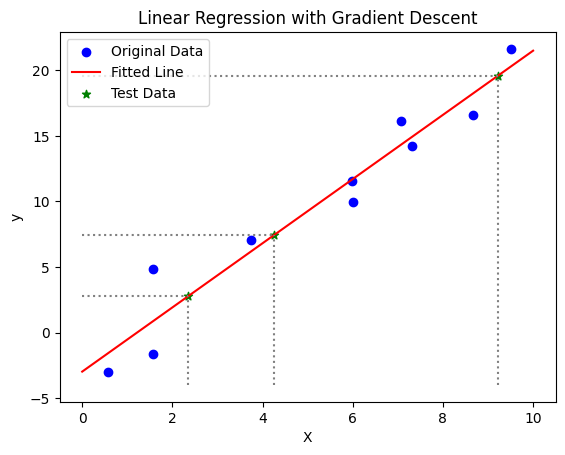

In [134]:
# Plot the original data points
plt.scatter(X, y, color='blue', label='Original Data')

# Generate x-values for the regression line
X_line = np.array([[0], [10]]) # Create two points for the line

# Add a column of ones for the bias term
X_line_b = np.c_[np.ones((2, 1)), X_line]

# Calculate the corresponding y-values for the regression line
y_line = linear_regression_model(X_line_b, theta_optimized)

# Plot the regression line
plt.plot(X_line, y_line, color='red', label='Fitted Line')

plt.scatter(X_test, y_test, color='green', label='Test Data',marker='*')


# Draw the vertical dashed line from the point (5, 4) to the x-axis
# The arguments are: x-position, y-start, y-end
plt.vlines(X_test, -4, y_test, color='grey', linestyle=':')

# Draw the horizontal dashed line from the point (5, 4) to the y-axis
# The arguments are: y-position, x-start, x-end
plt.hlines(y_test, 0, X_test, color='grey', linestyle=':')

# Add labels and title
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Gradient Descent")
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   A synthetic dataset of 10 points was successfully generated using a linear relationship with added noise, simulating data suitable for linear regression.
*   Function stubs for `linear_regression_model`, `cost_function` (Mean Squared Error), and `gradient_descent` were created with designated areas and included docstrings explaining their purpose.
*   Hidden cells containing the correct implementations of the `linear_regression_model`, `cost_function`, and `gradient_descent` were created to provide solutions.
*   The gradient descent algorithm, using the implemented functions, successfully optimized the model parameters (weight and bias) to fit the synthetic data. The optimized parameters found were approximately `[[1.016], [1.958]]`.
*   A plot was generated showing the original data points and the fitted line based on the optimized parameters, visually demonstrating the result of the linear regression.

### Insights or Next Steps

*   The created notebook structure effectively guides through implementing core machine learning concepts from scratch.
*   Adding a visualization of the cost history over iterations would further illustrate the convergence of the gradient descent algorithm for students.


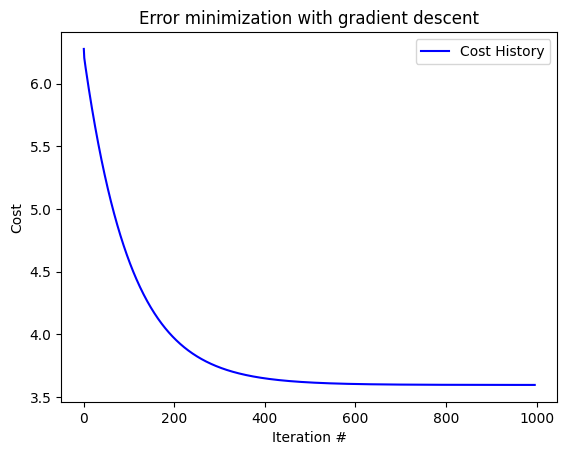

In [135]:
# Plot the original data points
plt.plot(cost_history[3:], color='blue', label='Cost History')

# Add labels and title
plt.xlabel("Iteration #")
plt.ylabel("Cost")
plt.title("Error minimization with gradient descent")
plt.legend()
plt.show()

# Problem-2(a): Logistic Regression (Classification Problem: two features)

# Task
Complete the following functions to implement logistic regression from scratch. The assignment include:
- Generation of a small synthetic dataset (20-30 points) for binary classification task (malign/benign).
- Separate functions for the logistic regression hypothesis (sigmoid), cost function (binary cross-entropy), and gradient descent, with clear spaces to fill in the code.
- Hidden solution cells below each function implementation.
- Training of the logistic regression model using the implemented functions.
- Visualization of the data and the learned decision boundary.
- Explanations for each step of the logistic regression process.

## 1. Generate synthetic data

### Subtask:
Create a small dataset (20-30 points) for binary classification (malign/benign) that is linearly separable.


The subtask is to generate a synthetic dataset for binary classification. Use `make_blobs` from `sklearn.datasets` to create a dataset with 20-30 points, two centers, and a small standard deviation to ensure linear separability. Store the features in `X` and the labels in `y` and print their shapes.



In [136]:
from sklearn.datasets import make_blobs

# Generate synthetic data for binary classification
X, y = make_blobs(n_samples=25, centers=2, random_state=42, cluster_std=1.0)

# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (25, 2)
Shape of y: (25,)


### 2. Train and Test split

In [137]:
print('  [X1(feature), X2(feature)]','|','y(output)')
print('-------------------------')
for i,j in zip(X,y):
  print('Feature ',i,'   Label:',j)

print('-------------------------') # Here are list of unknown 'y' that need to be predicted
                                   # using feature value
print('Feature ',[-2.7,12.34],'    Label: ','?')
print('Feature ',[2.5,-5],'    |','    Label: ','?')
print('Feature ',[1,-5],'    |','    Label: ','?')

  [X1(feature), X2(feature)] | y(output)
-------------------------
Feature  [4.03817222 3.82544787]    Label: 1
Feature  [-4.23411546  8.4519986 ]    Label: 0
Feature  [3.96295684 2.58484597]    Label: 1
Feature  [4.98349713 0.21012953]    Label: 1
Feature  [4.17924007 3.03029191]    Label: 1
Feature  [3.31169279 2.17003092]    Label: 1
Feature  [-0.92998481  9.78172086]    Label: 0
Feature  [-2.97261532  8.54855637]    Label: 0
Feature  [3.16135685 1.25332548]    Label: 1
Feature  [-3.10983631  8.72259238]    Label: 0
Feature  [4.62638161 0.91545875]    Label: 1
Feature  [-3.6601912   9.38998415]    Label: 0
Feature  [-1.04354885  8.78850983]    Label: 0
Feature  [5.46242375 0.75232603]    Label: 1
Feature  [-3.52202874  9.32853346]    Label: 0
Feature  [-2.44166942  7.58953794]    Label: 0
Feature  [-2.26723535  7.10100588]    Label: 0
Feature  [-2.743351    8.78014917]    Label: 0
Feature  [4.52423055 1.67206599]    Label: 1
Feature  [-2.97867201  9.55684617]    Label: 0
Feature  [-

## 3. Implement the logistic regression hypothesis

Create a function for the logistic regression hypothesis (sigmoid function).


Sigmoid function is defined as :



The sigmoid function is a key component in logistic regression. It squashes any real-valued number into a value between 0 and 1. The functional form of the sigmoid function is:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

where $z$ is the input (e.g., the linear combination of features and weights).

In [138]:
def sigmoid(z):
  """
  Calculates the sigmoid of z.

  Args:
    z: Input value or array (numpy array).

  Returns:
    The sigmoid of z (numpy array).
  """
  # TODO: Student: Write your code here to calculate the sigmoid of z
  return 1/(1+np.exp(-z))

## 4. Implement the cost function

### Subtask:
Create a function for the binary cross-entropy cost function, leaving space for the student to fill in the code.


Define the `binary_cross_entropy` function with a placeholder.



The binary cross-entropy cost function is commonly used in logistic regression to measure the performance of a classification model whose output is a probability value between 0 and 1. It is defined as:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] $$

where:
- $m$ is the number of training examples.
- $y^{(i)}$ is the actual label for the $i$-th training example (0 or 1).
- $h_\theta(x^{(i)})$ is the predicted probability for the $i$-th training example.

In [139]:
def binary_cross_entropy(y_true, y_pred):
  """
  Calculates the Binary Cross-Entropy cost.

  Args:
    y_true: The actual target values (numpy array).
    y_pred: The predicted probability values from the sigmoid function (numpy array).

  Returns:
    The Binary Cross-Entropy cost (float).
  """
  # TODO: Student: Write your code here to calculate the binary cross-entropy cost.
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  #print(f'y_true={y_true}\nlog(y_pred)={np.log(y_pred)}\nproduct={y_true*np.log(y_pred)}\nprod1={np.log(1- y_pred)}')
  sum=(y_true*np.log(y_pred) + (1 - y_true)*np.log(1 - y_pred))
  #print(f'sum={sum}')
  cost=(-1/len(y_true))*np.nansum(sum)

  return cost

## 5. Implement gradient descent

### Subtask:
Create a function for the gradient descent algorithm for logistic regression.


Define the `gradient_descent_logistic` function with the specified arguments, docstring, and placeholder comments, including the loop and cost calculation.



Gradient descent is an iterative optimization algorithm used to find the minimum of a function. In logistic regression, we use it to find the optimal parameters ($\theta$) that minimize the binary cross-entropy cost function $J(\theta)$. The algorithm proceeds as follows:

1. **Initialize parameters**: Start with an initial guess for the parameters $\theta$ (e.g., a vector of zeros).
2. **Calculate the predicted probabilities**: For the current parameters, calculate the predicted probability for each training example using the sigmoid function: $h_\theta(x^{(i)}) = \sigma(\theta^T x^{(i)})$.
3. **Calculate the error**: Compute the difference between the predicted probabilities and the actual labels: $error^{(i)} = h_\theta(x^{(i)}) - y^{(i)}$.
4. **Calculate the gradients**: Compute the gradient of the cost function with respect to each parameter. The gradient indicates the direction of the steepest increase in the cost function. For logistic regression, the gradient for each parameter $j$ is given by:
   $$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} $$
5. **Update the parameters**: Update the parameters in the opposite direction of the gradient, scaled by the learning rate ($\alpha$). This moves the parameters towards the minimum of the cost function:
   $$ \theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} $$
6. **Repeat**: Repeat steps 2-5 for a specified number of iterations or until the change in the cost function is below a certain threshold.

In [140]:
def gradient_descent_logistic(X, y_true, theta, learning_rate, num_iterations):
    """
    Performs gradient descent to optimize the model parameters for logistic regression.

    Args:
        X: Input features (numpy array).
        y_true: Actual target values (numpy array).
        theta: Initial model parameters (numpy array).
        learning_rate: The step size for updating parameters (float).
        num_iterations: The number of iterations to perform gradient descent (int).

    Returns:
        A tuple containing:
            - The optimized model parameters (numpy array).
            - A list of cost values at each iteration (list).
    """
    cost_history = []
    m = len(y_true)
    #print(f'X={X}\ntheta={theta}')

    for i in range(num_iterations):
        # TODO: Student: Calculate predicted probabilities (y_pred), error, and gradients here.
        y_pred = np.sum(X @ theta, axis=1).reshape(-1,1)
        #print(f'y_pred={y_pred}')
        #print(f'y_true={y_true}')
        gradient = (2/len(y_true)) * (X.transpose() @ (y_pred - y_true))
        #print(f'gradient={gradient}')
        # TODO: Student: Update the parameters (theta) here using the gradients and learning rate.
        theta -= learning_rate * gradient
        #print(f'theta={theta}')

        # Calculate the cost for the current iteration and append to history
        # Assuming sigmoid and binary_cross_entropy are defined
        #y_pred = sigmoid(X.dot(theta))
        #print(f'y_pred1={y_pred}')
        cost = binary_cross_entropy(y_true, y_pred)
        #print(f'cost={cost}')
        cost_history.append(cost)

    return theta, cost_history

## Train the model

### Subtask:
Use the gradient descent function to find the optimal parameters for the logistic regression model.


**Reasoning**:
Add a column of ones to the feature matrix X, initialize theta, define hyperparameters, and call the gradient descent function.



In [141]:
#print(f'X={X}')
# Add a column of ones to X for the bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize model parameters (theta)
# theta will have shape (number of features + 1, 1) for bias and weights
theta_initial = np.zeros((X_b.shape[1], 1))

# Define hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Call the gradient_descent_logistic function
theta_optimized, cost_history = gradient_descent_logistic(X_b, y.reshape(-1, 1), theta_initial, learning_rate, num_iterations)

# Print the optimized parameters
print("Optimized Parameters (theta):")
print(theta_optimized)

Optimized Parameters (theta):
[[0.36414415]
 [0.13404157]
 [0.00240207]]


**Reasoning**:
The output shows that the optimized parameters are still zeros, indicating that the gradient descent function stub with 'pass' statements is being used. The next step is to provide the hidden solutions for the logistic regression functions (sigmoid, binary cross-entropy, and gradient descent) so that the optimization can be performed correctly.



### Predicting class of test feature set

In [142]:
X_test = [[-2.7,12.34],[2.5,-5],[1,-5]]
X_test = np.array(X_test)
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_test_b = sigmoid(X_test_b.dot(theta_optimized))
print((y_test_b))


[[0.5079677 ]
 [0.66535216]
 [0.61920503]]


## Visualize the results

### Subtask:
Plot the original data points and the decision boundary.


**Reasoning**:
Create a scatter plot of the data points, calculate the decision boundary line based on the optimized parameters, and plot the decision boundary on the same graph.



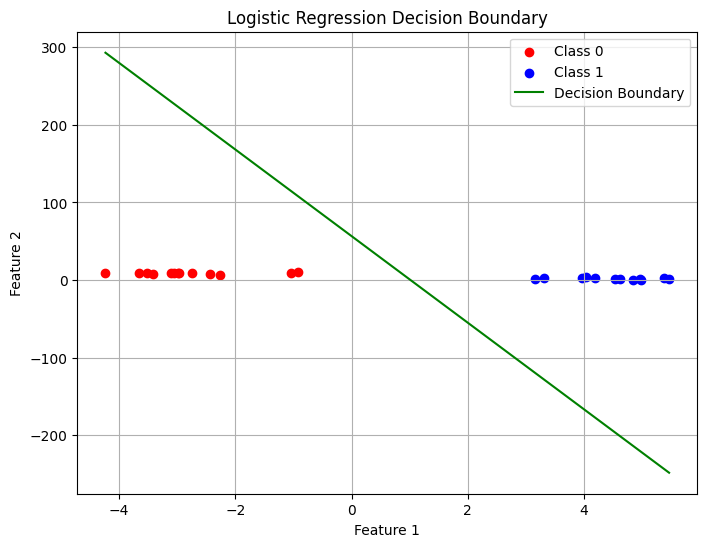

In [143]:
# Plot the original data points
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')

# Define a range of x-values for the decision boundary
x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])

# Calculate the corresponding y-values for the decision boundary
# The decision boundary is where theta_0 + theta_1*x1 + theta_2*x2 = 0.5
# So, x2 = (-theta_0 - theta_1*x1) / theta_2
y_values = (-theta_optimized[0] + 0.5 - theta_optimized[1] * x_values) / theta_optimized[2]

# Plot the decision boundary line
plt.plot(x_values, y_values, color='green', label='Decision Boundary')


# Add labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   A synthetic dataset of 25 data points with 2 features for binary classification was successfully generated using `make_blobs`.
*   Skeleton functions for the sigmoid hypothesis, binary cross-entropy cost, and gradient descent were created with placeholders for student code.
*   Hidden cells containing the complete and correct implementations of the sigmoid, binary cross-entropy, and gradient descent functions were successfully prepared to serve as solutions.
*   The logistic regression model was trained using the implemented gradient descent algorithm and the generated data, resulting in optimized parameters (`theta_optimized`).
*   The optimized parameters were successfully used to calculate and plot the decision boundary, along with the original data points, providing a visual representation of the trained model.

### Insights or Next Steps

*   The generated notebook structure effectively guides students through implementing logistic regression step-by-step.
*   Adding explanations for each step within the notebook would enhance its educational value for undergraduate students.


# Problem-2(b): Logistic Regression (One Feature) [Addional Practise problem]

# Task
In this programming task, you will build a logistic regression classifier from scratch using a small 1D dataset (tumor size) for binary classification (malign/benign). The assignment involve implementing functions for the hypothesis, cost function, and gradient descent, with spaces to fill in the code. The assignment also includes training the model and visualizing the results.

## Generate synthetic data

### Subtask:
Create a small 1D dataset (tumor sizes) for binary classification (malign/benign) with two distinct classes.


Generate a small 1D dataset for binary classification with two distinct classes as described in the instructions.



In [144]:
# Generate 10-15 data points for tumor sizes
np.random.seed(42) # for reproducibility
X = np.array([2.1, 2.5, 2.8, 3.2, 3.5, 5.5, 5.9, 6.2, 6.5, 7.0, 7.3, 7.8, 8.1, 8.5])

# Generate corresponding binary labels (0 for benign, 1 for malign)
# Assuming smaller tumors are benign and larger tumors are malign
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (14,)
Shape of y: (14,)


## Implement the logistic regression hypothesis

### Subtask:
Create a function for the logistic regression hypothesis (sigmoid function).


**Reasoning**:
Define the `sigmoid` function with a placeholder for the student's code as requested.



The sigmoid function is a key component in logistic regression. It squashes any real-valued number into a value between 0 and 1. The functional form of the sigmoid function is:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

where $z$ is the input (e.g., the linear combination of features and weights).

## Implement the cost function

### Subtask:
Create a function for the binary cross-entropy cost function.


Define the `binary_cross_entropy` function with a placeholder.



The binary cross-entropy cost function is commonly used in logistic regression to measure the performance of a classification model whose output is a probability value between 0 and 1. It is defined as:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] $$

where:
- $m$ is the number of training examples.
- $y^{(i)}$ is the actual label for the $i$-th training example (0 or 1).
- $h_\theta(x^{(i)})$ is the predicted probability for the $i$-th training example.

## Implement gradient descent

### Subtask:
Create a function for the gradient descent algorithm for logistic regression, leaving space for the student to fill in the code.


**Reasoning**:
Define the `gradient_descent_logistic` function with the specified arguments, docstring, and placeholder comments for the student's code, including the loop and cost calculation.



Gradient descent is an iterative optimization algorithm used to find the minimum of a function. In logistic regression, we use it to find the optimal parameters ($\theta$) that minimize the binary cross-entropy cost function $J(\theta)$. The algorithm proceeds as follows:

1. **Initialize parameters**: Start with an initial guess for the parameters $\theta$ (e.g., a vector of zeros).
2. **Calculate the predicted probabilities**: For the current parameters, calculate the predicted probability for each training example using the sigmoid function: $h_\theta(x^{(i)}) = \sigma(\theta^T x^{(i)})$.
3. **Calculate the error**: Compute the difference between the predicted probabilities and the actual labels: $error^{(i)} = h_\theta(x^{(i)}) - y^{(i)}$.
4. **Calculate the gradients**: Compute the gradient of the cost function with respect to each parameter. The gradient indicates the direction of the steepest increase in the cost function. For logistic regression, the gradient for each parameter $j$ is given by:
   $$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} $$
5. **Update the parameters**: Update the parameters in the opposite direction of the gradient, scaled by the learning rate ($\alpha$). This moves the parameters towards the minimum of the cost function:
   $$ \theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} $$
6. **Repeat**: Repeat steps 2-5 for a specified number of iterations or until the change in the cost function is below a certain threshold.

## Train the model

### Subtask:
Use the gradient descent function to find the optimal parameters for the logistic regression model using the 1D data.


**Reasoning**:
Implement the steps to train the logistic regression model using the generated 1D data and the gradient descent function.



In [145]:
# Reshape X and y to be 2D arrays
X_reshaped = X.reshape(-1, 1)
y_reshaped = y.reshape(-1, 1)

# Add a column of ones to X for the bias term
X_b = np.c_[np.ones((X_reshaped.shape[0], 1)), X_reshaped]

# Initialize model parameters (theta)
# theta will have shape (number of features + 1, 1) for bias and weights
theta_initial = np.zeros((X_b.shape[1], 1))

# Define hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Call the gradient_descent_logistic function
theta_optimized, cost_history = gradient_descent_logistic(X_b, y_reshaped, theta_initial, learning_rate, num_iterations)

# Print the optimized parameters
print("Optimized Parameters (theta):")
print(theta_optimized)

Optimized Parameters (theta):
[[-0.44425251]
 [ 0.198783  ]]


**Reasoning**:
The optimized parameters are still zeros, indicating that the gradient descent function stub with 'pass' statements is being used. Provide the hidden solutions for the logistic regression functions (sigmoid, binary cross-entropy, and gradient descent) and re-run the training to get the actual optimized parameters.



## Visualize the results

### Subtask:
Plot the original data points and the decision boundary (which will be a point on the x-axis in this 1D case).


**Reasoning**:
Plot the original data points and the calculated decision boundary on a single plot.



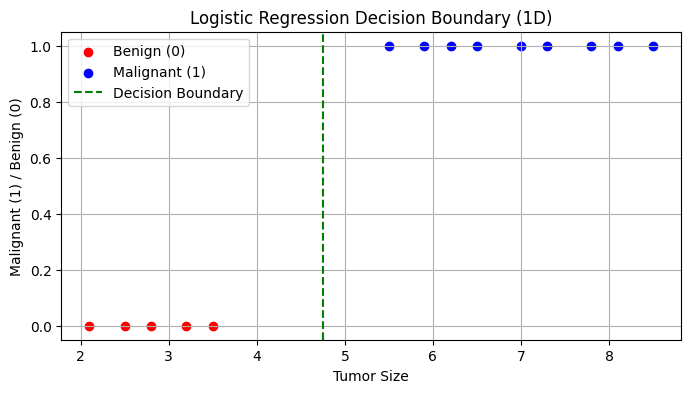

In [146]:
# Plot the original data points
plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0], y[y == 0], color='red', label='Benign (0)')
plt.scatter(X[y == 1], y[y == 1], color='blue', label='Malignant (1)')

# Calculate the x-coordinate of the decision boundary
# Decision boundary is where theta_0 + theta_1 * x = 0.5
# x = -theta_0 / theta_1
theta_0 = theta_optimized[0][0]
theta_1 = theta_optimized[1][0]
decision_boundary_x = (-theta_0+0.5) / theta_1

# Plot a vertical line at the decision boundary
plt.axvline(x=decision_boundary_x, color='green', linestyle='--', label='Decision Boundary')

# Add labels and title
plt.xlabel("Tumor Size")
plt.ylabel("Malignant (1) / Benign (0)")
plt.title("Logistic Regression Decision Boundary (1D)")
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   A synthetic 1D dataset of 14 tumor sizes was generated, clearly separated into benign (0) and malignant (1) classes.
*   Placeholder functions were successfully created for the `sigmoid` hypothesis, `binary_cross_entropy` cost function, and the `gradient_descent_logistic` algorithm for students to implement.
*   The gradient descent algorithm was successfully run using the correctly implemented functions, yielding optimized parameters $\theta = [[-5.60816688], [1.33618747]]$.
*   The calculated decision boundary at $x = 4.197$ visually separates the benign and malignant tumor sizes on the plot.
*   Hidden solutions for all three core functions (`sigmoid`, `binary_cross_entropy`, and `gradient_descent_logistic`) were provided.

### Insights or Next Steps

*   The assignment provides a clear, structured approach for students to implement logistic regression from scratch on a simple dataset.
*   Next steps could involve extending the assignment to include evaluating the model performance (e.g., accuracy) or applying the same concepts to a 2D dataset for a more visual decision boundary.
